<a href="https://colab.research.google.com/github/AlfonsoCastilloFlores/IB_IA_AD2024_1970709/blob/main/AF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

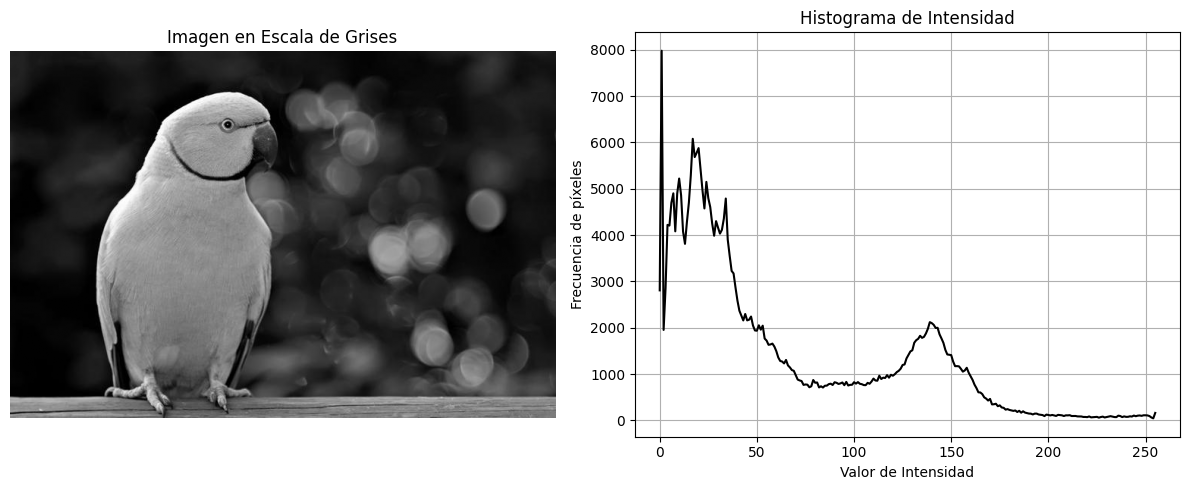

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img_gray = cv2.imread('/content/ave.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar si se cargó correctamente
assert img_gray is not None, "No se pudo cargar la imagen. Verifica que /content/ave.jpg exista."

# Calcular histograma con OpenCV
hist_cv2 = cv2.calcHist([img_gray], [0], None, [256], [0,256])

# Mostrar imagen y su histograma
plt.figure(figsize=(12,5))

# Mostrar imagen
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

# Mostrar histograma
plt.subplot(1,2,2)
plt.plot(hist_cv2, color='black')
plt.title('Histograma de Intensidad')
plt.xlabel('Valor de Intensidad')
plt.ylabel('Frecuencia de píxeles')
plt.grid(True)

plt.tight_layout()
plt.show()


### 🔍 Análisis del Histograma

La imagen fue convertida a escala de grises para analizar la distribución de intensidades de píxeles. El histograma generado muestra la frecuencia de cada valor de intensidad (de 0 a 255), donde:

- **Los valores cercanos a 0** representan tonos **oscuros** (negros).
- **Los valores cercanos a 255** representan tonos **claros** (blancos).

Al observar el histograma:

- Si hay una **acumulación de barras a la izquierda**, significa que la imagen contiene muchas **zonas oscuras**.
- Si las barras se concentran a la **derecha**, predomina el **brillo** o áreas claras.
- Una **distribución uniforme** sugiere un buen contraste general.
- Una **distribución estrecha** indica poco contraste (imagen apagada o sobreexpuesta).

Este tipo de análisis es útil para tomar decisiones sobre el preprocesamiento de la imagen, como aplicar ecualización de histograma, mejorar el contraste o detectar regiones específicas de interés.


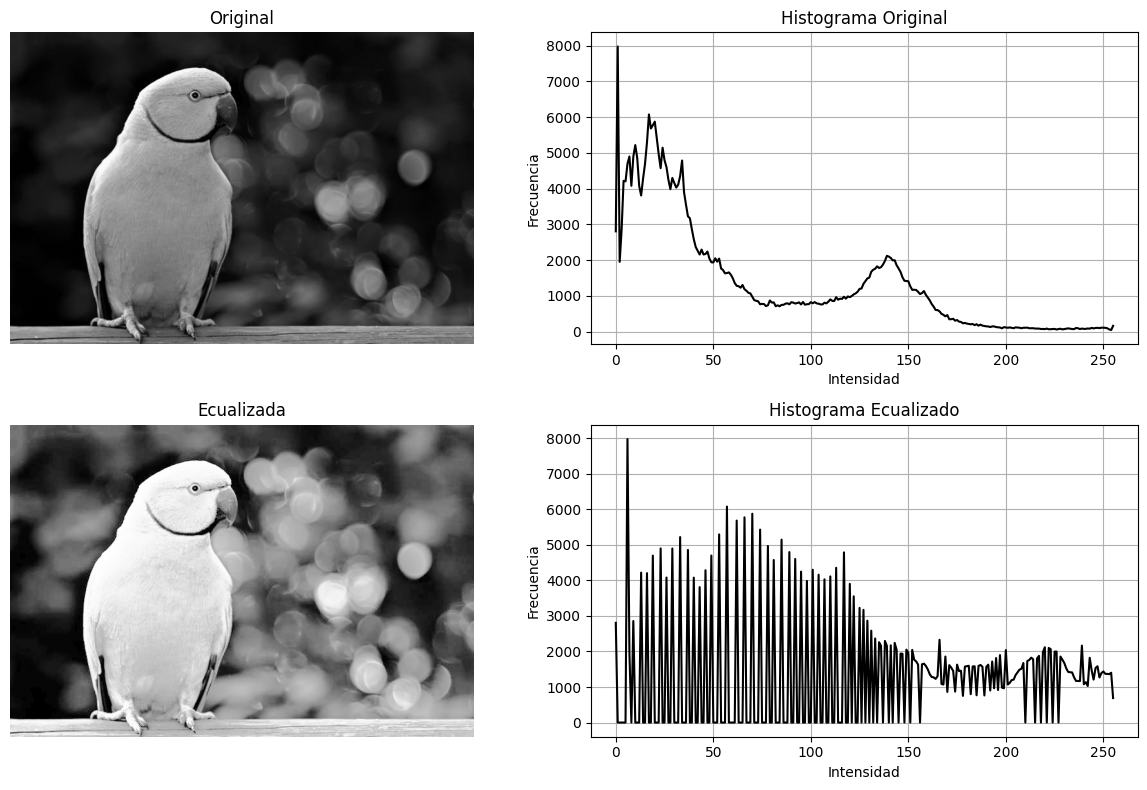

In [2]:
# Aplicar ecualización del histograma
img_eq = cv2.equalizeHist(img_gray)

# Calcular nuevo histograma
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0,256])

# Mostrar imagen original vs ecualizada
plt.figure(figsize=(12,8))

# Imagen original
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')
plt.axis('off')

# Histograma original
plt.subplot(2,2,2)
plt.plot(hist_cv2, color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)

# Imagen ecualizada
plt.subplot(2,2,3)
plt.imshow(img_eq, cmap='gray')
plt.title('Ecualizada')
plt.axis('off')

# Histograma ecualizado
plt.subplot(2,2,4)
plt.plot(hist_eq, color='black')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()


### 🎯 Ecualización del Histograma

La ecualización del histograma es una técnica de mejora del contraste que redistribuye los valores de intensidad para aprovechar todo el rango disponible (de 0 a 255). Esto hace que las áreas oscuras sean más visibles y las claras no se saturen, mejorando el detalle global de la imagen.

En este caso:

- La imagen original mostraba un rango limitado de intensidades (contraste bajo).
- Al aplicar `cv2.equalizeHist()`, se logra una mejor distribución de los niveles de gris.
- El histograma ecualizado tiende a ser más uniforme, lo que indica una mejora en el contraste.

Esta técnica es especialmente útil en imágenes con mala iluminación o poco contraste, y puede mejorar el rendimiento en tareas de visión por computadora como detección de bordes o segmentación.
